Saving archive.zip to archive (1).zip
First 5 rows of dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Emb

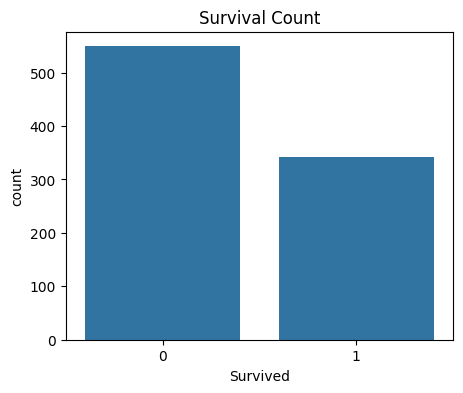

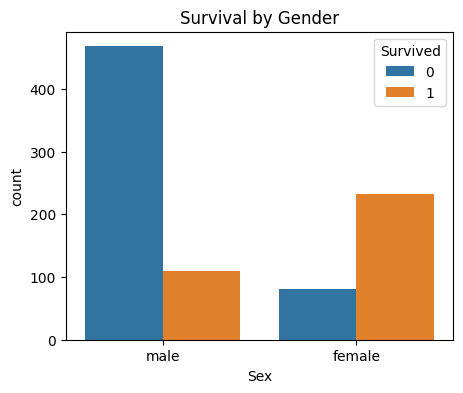

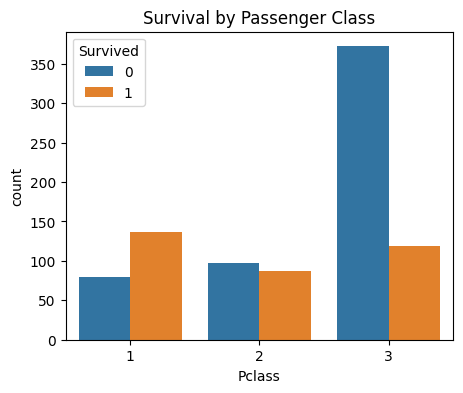

/tmp/ipython-input-4008518674.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)



Model Accuracy: 0.7865168539325843


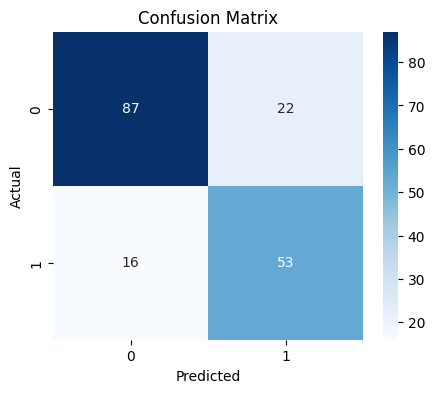


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178


TASK 1: TITANIC SURVIVAL PREDICTION COMPLETED SUCCESSFULLY ✅


In [2]:
# Upload dataset
from google.colab import files
import os
import zipfile

uploaded = files.upload()

# Assuming the uploaded file is archive.zip and contains Titanic-Dataset.csv
# Unzip the uploaded file
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall('.')
        # Assuming the CSV file inside is 'Titanic-Dataset.csv'
        # You might need to adjust this if the name is different
        csv_file_name = 'Titanic-Dataset.csv'
    else:
        csv_file_name = fn # If it's a direct CSV upload, use its name

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(csv_file_name)

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# -------------------------------
# Data Visualization
# -------------------------------

plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# -------------------------------
# Data Preprocessing
# -------------------------------

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# -------------------------------
# Feature Selection
# -------------------------------

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# -------------------------------
# Train-Test Split
# -------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Model Training
# -------------------------------

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -------------------------------
# Prediction
# -------------------------------

y_pred = model.predict(X_test)

# -------------------------------
# Evaluation
# -------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nTASK 1: TITANIC SURVIVAL PREDICTION COMPLETED SUCCESSFULLY ✅")
